# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2024

# Week 3

# § Network flows and linear programming

# Overview

So far we have looked at a few examples of linear programs. The key step
in modeling these problems is to write down the program itself.

As we saw, for simple programs, such as the carpenter problem, we can
figure it out geometrically. There were only a few variables and a few
obvious constraints and it was easy to check all the “vertices.”

# Network flows

We are going to consider some more complex situations for which we will
use a *network flow* to help produce the corresponding \*linear program.

Let’s recall that a *directed graph* is a pair $G = (V,E)$ where the
elements of the set $V$ are the *vertices* of the graph, and where
$E ⊂ V × V$ are the *edges* of $G$. Thus, an element $e = (a,b) ∈ E$
represents a directed edge from vertex $a$ to vertex $b$.

A node is a *source* if it only appears in outgoing edges, and a node is
a *sink* if it only appears in incoming edges.

For example, `S` is a source and `T` is a sink in the following directed
graph.

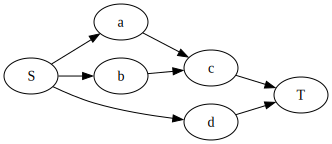

In [1]:
from graphviz import Digraph

class digraph:

  def __init__(self,vertices,edges,title='example'):
    self.vertices=vertices
    self.edges=edges
    self.title=title

  def drawSubgraph(self,vertices=None):
    dot = Digraph(dg.title)
    dot.attr(rankdir='LR')

    vv = vertices if vertices else dg.vertices

    for x in vv:
      dot.node(x)

    for (a,b) in dg.edges:
      if (a in vv) and (b in vv):
        dot.edge(a,b)

    return dot


vv = [ 'S','a','b','c','d','T']
ee = [ ('S','a'),
       ('S','b'),
       ('S','d'),
       ('a','c'),
       ('b','c'),
       ('c','T'),
       ('d','T')
       ]


dg = digraph(vertices = vv,
             edges = ee)

dg.drawSubgraph()

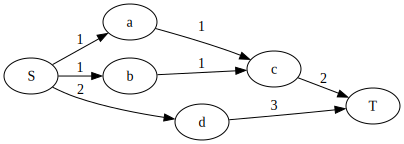

In [23]:

class digraphWithCapacity:

  def __init__(self,vertices,edges,cap,title='example'):
    self.vertices=vertices
    self.edges=edges
    self.cap=cap
    self.title=title

  def drawSubgraph(self,vertices=None):
    dot = Digraph(dg.title)
    dot.attr(rankdir='LR')

    vv = vertices if vertices else dg.vertices

    for x in vv:
      dot.node(x)

    for (a,b) in dg.edges:
      if (a in vv) and (b in vv):
        try: 
          cab = self.cap[(a,b)]
          dot.edge(a,b,label=format(cab))
        except:
          dot.edge(a,b)

    return dot

cc = { ('S','a'):1,
       ('S','b'):1,
       ('S','d'):2,
       ('a','c'):1,
       ('b','c'):1,
       ('c','T'):2,
       ('d','T'):3
       }
  
dgc=digraphWithCapacity(vertices=vv,edges=ee,cap=cc)
dgc.drawSubgraph()

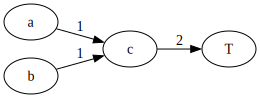

In [3]:
dgc.drawSubgraph(['a','b','c','T'])

In [24]:
import numpy as np

class networkFlow(digraphWithCapacity):

  def __init__(self,vertices,edges,cap,source,sink,title='example'):
      digraphWithCapacity.__init__(self,vertices,edges,cap,title)
      self.source = source
      self.sink= sink
      self.check()
  def getIncoming(self,vertex):
      return filter(lambda v: v[1] == vertex, self.edges)
    
  def getOutgoing(self,vertex):
      return filter(lambda v: v[0] == vertex, self.edges)
    
  def getCap(self,edge):
      try:
          return self.cap[edge]
      except:
          return 0

  def getCap(self,edge):
      try:
          return self.cap[edge]
      except:
          return 0
  
  def sumCap(self,edgeList):    #
      return np.sum(np.array(list(map(self.getCap,edgeList))))

  def checkVertex(self,vertex):
      input = self.sumCap(self.getIncoming(vertex))
      output = self.sumCap(self.getOutgoing(vertex))
      if input != output:
          raise ValueError(f"conservation law fails for vertex {vertex}")

  def check(self):
      for v in self.vertices:
          if not v in [self.source,self.sink]:
              self.checkVertex(v)

nf=networkFlow(vertices=vv,edges=ee,cap=cc,source='S',sink='T')


ValueError: conservation law fails for vertex d